# Save and load results as HDF5 files

In [1]:
import pypesto
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pypesto.storage import (save_to_hdf5, read_from_hdf5)
import tempfile

%matplotlib inline

## Define the objective and problem

In [2]:
objective = pypesto.Objective(fun=sp.optimize.rosen, 
                              grad=sp.optimize.rosen_der, 
                              hess=sp.optimize.rosen_hess)

dim_full = 10
lb = -5 * np.ones((dim_full, 1))
ub = 5 * np.ones((dim_full, 1))

problem = pypesto.Problem(objective=objective, lb=lb, ub=ub)

## Run optimization

In [3]:
# create optimizers
optimizer = pypesto.ScipyOptimizer(method='l-bfgs-b')

# set number of starts
n_starts = 20

# Run optimizaitons
result = pypesto.minimize(
    problem=problem, optimizer=optimizer,
    n_starts=n_starts)

In [4]:
result.optimize_result.list

[{'id': '8',
  'x': array([1.00000001, 0.99999999, 0.99999997, 0.99999998, 0.99999998,
         0.99999999, 0.99999996, 0.99999987, 0.99999971, 0.9999995 ]),
  'fval': 1.4448869867069234e-12,
  'grad': array([ 9.91613312e-06, -2.33793663e-07, -1.84487477e-05, -1.24826804e-06,
         -7.03416051e-06,  1.12040576e-05,  1.88713028e-05, -4.68014961e-07,
         -3.65179645e-05,  1.53152743e-05]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 73,
  'n_grad': 73,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([1.00000001, 0.99999999, 0.99999997, 0.99999998, 0.99999998,
         0.99999999, 0.99999996, 0.99999987, 0.99999971, 0.9999995 ]),
  'fval0': 116315.16334351365,
  'history': <pypesto.objective.history.History at 0x7fefee65a750>,
  'exitflag': 0,
  'time': 0.010613441467285156,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '16',
  'x': array([0.99999994, 0.99999998, 1.        , 1.00000002, 1.00000004,
         1.00000001, 1.       

## Plot results

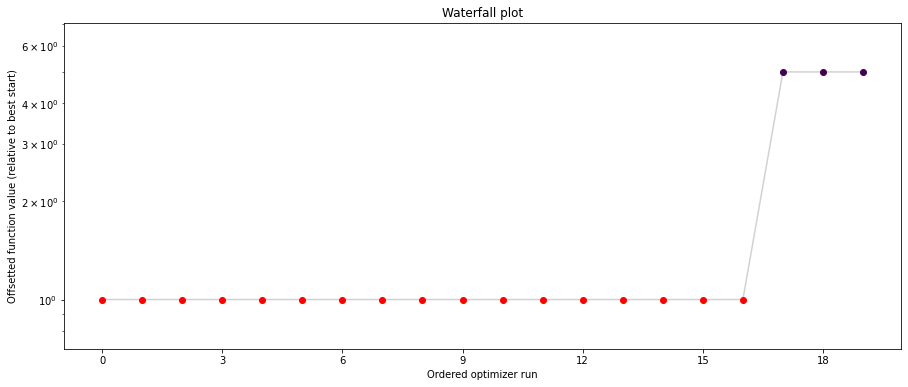

In [5]:
import pypesto.visualize

# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

## Save optimization result as HDF5 file

In [6]:
fn = tempfile.mktemp(".hdf5")

# Write result
hdf5_writer = save_to_hdf5.OptimizationResultHDF5Writer(fn)
hdf5_writer.write(result)

# Write problem
hdf5_writer = save_to_hdf5.ProblemHDF5Writer(fn)
hdf5_writer.write(problem)

In [7]:
# Read result and problem
hdf5_reader = read_from_hdf5.OptimizationResultHDF5Reader(fn)
result = hdf5_reader.read()

In [8]:
result.optimize_result.list

[{'id': '8',
  'x': array([1.00000001, 0.99999999, 0.99999997, 0.99999998, 0.99999998,
         0.99999999, 0.99999996, 0.99999987, 0.99999971, 0.9999995 ]),
  'fval': 1.4448869867069234e-12,
  'grad': array([ 9.91613312e-06, -2.33793663e-07, -1.84487477e-05, -1.24826804e-06,
         -7.03416051e-06,  1.12040576e-05,  1.88713028e-05, -4.68014961e-07,
         -3.65179645e-05,  1.53152743e-05]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 73,
  'n_grad': 73,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([1.00000001, 0.99999999, 0.99999997, 0.99999998, 0.99999998,
         0.99999999, 0.99999996, 0.99999987, 0.99999971, 0.9999995 ]),
  'fval0': 116315.16334351365,
  'history': None,
  'exitflag': 0,
  'time': 0.010613441467285156,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '16',
  'x': array([0.99999994, 0.99999998, 1.        , 1.00000002, 1.00000004,
         1.00000001, 1.        , 1.00000012, 1.0000003 , 1.00000051]),
  'fval'

## Plot results

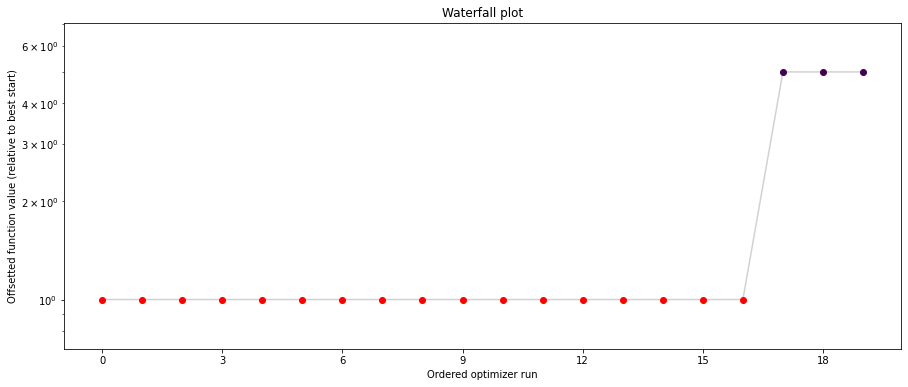

In [9]:
# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

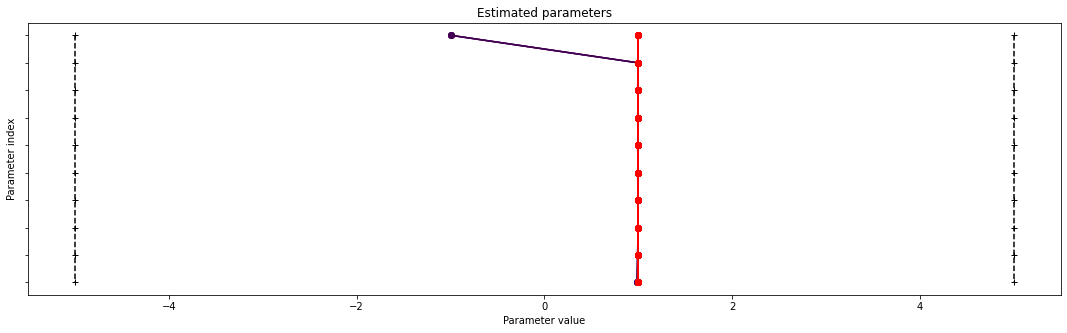

In [10]:
pypesto.visualize.parameters(result,
                            balance_alpha=False)